In [1]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import pandas as pd
import math
import time
import os 


In [56]:
window_seq=np.power(2,range(1,8))
n=1000
cluster=range(500,520)
target=np.concatenate([np.zeros(int(n/2))+1, np.zeros(int(n/2))])
window_seq


array([  2,   4,   8,  16,  32,  64, 128])

500

In [50]:
math.sqrt((2*math.log(n/len(cluster)))/len(cluster))

0.6254616699229575

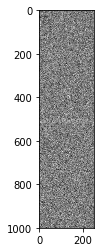

In [58]:

size=int(n/4)
X=np.zeros((n,size))#choose n/4 = # of observations per pixel.
idx = [i for i in range(n) if i not in cluster]
for i in idx:
    X[i,:]=np.random.randn(size)
    
for i in cluster:
    X[i,:]=np.random.randn(size)+math.sqrt((2*math.log(n/len(cluster)))/len(cluster))

plt.gray()
plt.imshow(X)

In [1034]:
scan_1d(d[:,1],window_seq,k=1)

/Users/StevenWang/Desktop/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(500, 515, 16)

In [513]:
cluster_idx=np.zeros(len(window_seq),dtype='int64')
I_hat=np.zeros(len(window_seq))
z_score=np.zeros(n)
for i in range(n):
    z_score[i]=math.pow(np.mean(d[i,(target==1)])-np.mean(d[i,(target==0)])*math.sqrt(n/2),2)

for w in range(len(window_seq)):
    window=window_seq[w]
    scan_tmp=np.zeros(n-window+1,dtype='float64')
    for i in range(n-window+1):
        scan_tmp[i]=sum(z_score[i:(i+window)])/math.sqrt(window)
    I_hat[w]=max(scan_tmp)
    cluster_idx[w]=np.where(scan_tmp==I_hat[w])[0]



[500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519]

In [35]:
#simulation
B=30
mu_seq=np.arange(0.1, 1, 0.02)
contain_tmp1=range(B)
size_tmp1=range(B)
sym_diff_tmp1=range(B)
time_tmp1=range(B)
rho_tmp1=range(B)


max_size=100

contain=range(max_size-4)
size=range(max_size-4)
sym_diff=range(len(mu_seq))
time_seq=range(len(mu_seq))
rho=range(len(mu_seq))

for l in range(len(mu_seq)):
    cluster_size=96
    
    for k in range(B):
        start_time=time.time()
        #start=np.random.randint(n-cluster_size,size=1)[0]
        cluster=range(n/2,n/2+cluster_size)
        #noise_cluster=[800,801,802,803 ,804,805,806,807,808,900,901,902,903,904,905,906,907,908,909,700,701,702,703,704,705,706,590,591,592,593,490,492,493]
        #generate d
        d=np.zeros((n,n/4))#choose n/4 = # of observations per pixel.
        idx = [i for i in range(n) if i not in cluster]
        
        
        for i in idx:
            d[i,:]=np.random.randn(n/4)
        
        for i in cluster:
            d[i,:]=np.random.randn(n/4)+mu_seq[l]*math.sqrt((2*math.log(n/len(cluster)))/len(cluster))

        
        z_score_tmp=np.zeros(n)
        for i in range(n):
            z_score_tmp[i]=math.pow((np.mean(d[i,]))/(np.std(d[i,])/math.sqrt(n/4)),2)
    
        result_tmp=scan_1d(d,window_seq)#300 small better 20 large cluster
        tmp1=(sum(z_score_tmp[result_tmp[0][1]:(result_tmp[0][2]+1)])-np.mean(z_score_tmp)*result_tmp[0][3])/(math.sqrt(np.var(z_score_tmp)*result_tmp[0][3]))
        tmp2=(sum(z_score_tmp[result_tmp[1][1]:(result_tmp[1][2]+1)])-np.mean(z_score_tmp)*result_tmp[1][3])/(math.sqrt(np.var(z_score_tmp)*result_tmp[1][3]))
        best=np.argmax(np.array([tmp1,tmp2]))
        result=result_tmp[best]
        
        #contain_tmp1[k]=int(cluster[0]>=result[1] and cluster[cluster_size-1]<=result[2])
        #size_tmp1[k]=result[3]
        sym_diff_tmp1[k]=len((set(cluster))^set(range(result[1],result[2]+1)))
        time_tmp1[k]=time.time()-start_time
        rho_tmp1[k]=len((set(cluster)).intersection(set(range(result[1],result[2]+1))))/math.sqrt(len(cluster)*len(range(result[1],result[2]+1)))
        
    #contain[l-4]=np.mean(contain_tmp1)
    #size[l-4]=np.mean(size_tmp1)
    sym_diff[l]=np.mean(sym_diff_tmp1)
    time_seq[l]=np.mean(time_tmp1)
    rho[l]=np.mean(rho_tmp1)

locals()['rho_{0}'.format( "%02d" % (cluster_size))]=rho

In [4]:
rho_true_02=np.loadtxt('rho_true_2.txt')
rho_true_04=np.loadtxt('rho_true_4.txt')
rho_true_06=np.loadtxt('rho_true_6.txt')
rho_true_08=np.loadtxt('rho_true_8.txt')
rho_true_12=np.loadtxt('rho_true_12.txt')
rho_true_16=np.loadtxt('rho_true_16.txt')
rho_true_24=np.loadtxt('rho_true_24.txt')
rho_true_32=np.loadtxt('rho_true_32.txt')
rho_true_48=np.loadtxt('rho_true_48.txt')
rho_true_64=np.loadtxt('rho_true_64.txt')
rho_true_96=np.loadtxt('rho_true_96.txt')
rho_true_128=np.loadtxt('rho_true_128.txt')


In [5]:
mu_seq=np.arange(0.1, 1, 0.02)


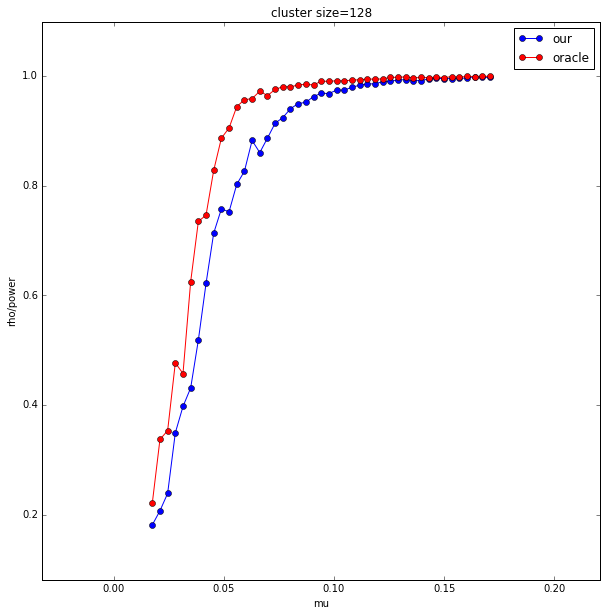

In [20]:
tmp=rho_128
tmp1=rho_true_128
f,ax =plt.subplots(figsize=(10, 10))
ax.set_xlim([np.min(mu_seq*math.sqrt((2*math.log(n/cluster_size))/cluster_size))-0.05,np.max(mu_seq*math.sqrt((2*math.log(n/cluster_size))/cluster_size))+0.05])
ax.set_ylim([np.min(tmp)-0.1,np.max(tmp)+0.1])
line1=ax.plot(mu_seq*math.sqrt((2*math.log(n/cluster_size))/cluster_size),tmp,'-o',label='our')
line2=ax.plot(mu_seq*math.sqrt((2*math.log(n/cluster_size))/cluster_size),tmp1,'-o',color='red',label='oracle')
ax.legend()
ax.set_title('cluster size=128')
ax.set_ylabel('rho/power')
ax.set_xlabel('mu')
plt.savefig('rho_128.png')

In [22]:
mu_seq*math.sqrt((2*math.log(n/cluster_size))/cluster_size)

array([ 0.01743699,  0.02092438,  0.02441178,  0.02789918,  0.03138657,
        0.03487397,  0.03836137,  0.04184877,  0.04533616,  0.04882356,
        0.05231096,  0.05579835,  0.05928575,  0.06277315,  0.06626054,
        0.06974794,  0.07323534,  0.07672274,  0.08021013,  0.08369753,
        0.08718493,  0.09067232,  0.09415972,  0.09764712,  0.10113452,
        0.10462191,  0.10810931,  0.11159671,  0.1150841 ,  0.1185715 ,
        0.1220589 ,  0.1255463 ,  0.12903369,  0.13252109,  0.13600849,
        0.13949588,  0.14298328,  0.14647068,  0.14995807,  0.15344547,
        0.15693287,  0.16042027,  0.16390766,  0.16739506,  0.17088246])

In [74]:
math.sqrt((2*math.log(n/len(cluster)))/len(cluster))

0.30400596059067553

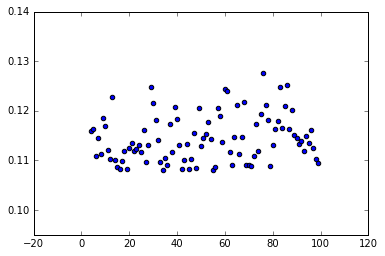

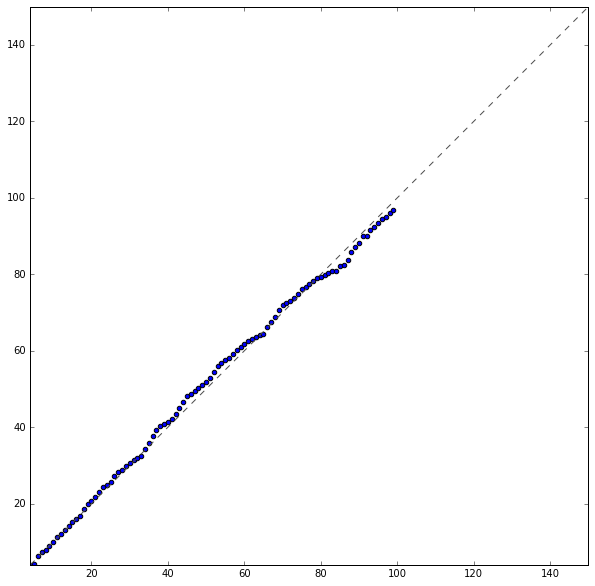

In [38]:
#plt.scatter(range(4,100),np.divide(sym_diff,range(4,100)))
plt.scatter(range(4,100),time_seq)
f,ax =plt.subplots(figsize=(10, 10))
ax.set_xlim([4,150])
ax.set_ylim([4,150])
ax.scatter(range(4,100),size)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

In [40]:

time_seq=np.array(time_seq,dtype='float64')
time_seq.tofile("time_our.txt",sep="\n")
size=np.array(size,dtype='float64')
size.tofile("size.txt",sep="\n")
sym_diff=np.array(sym_diff,dtype='float64')
sym_diff.tofile("sym_diff.txt",sep="\n")

In [40]:
cluster=range(100,100+100)

#generate d
d=np.zeros((n,n/4))#choose n/4 = # of observations per pixel.
idx = [i for i in range(n) if i not in cluster]

for i in idx:
    d[i,:]=np.random.randn(n/4)
    
for i in cluster:
    d[i,:]=np.random.randn(n/4)+4*math.sqrt((2+math.log(n/len(cluster)))/len(cluster))

z_score_tmp=np.zeros(n)
for i in range(n):
    z_score_tmp[i]=math.pow((np.mean(d[i,]))/(np.std(d[i,])/math.sqrt(n/4)),2)

result_tmp=scan_1d(d,window_seq)
tmp1=(sum(z_score_tmp[result_tmp[0][1]:(result_tmp[0][2]+1)])-np.mean(z_score_tmp)*result_tmp[0][3])/(math.sqrt(np.var(z_score_tmp)*result_tmp[0][3]))
tmp2=(sum(z_score_tmp[result_tmp[1][1]:(result_tmp[1][2]+1)])-np.mean(z_score_tmp)*result_tmp[1][3])/(math.sqrt(np.var(z_score_tmp)*result_tmp[1][3]))
best=np.argmax(np.array([tmp1,tmp2]))
result=result_tmp[best]
result

(1752.1108960700119, 99, 200, 102)

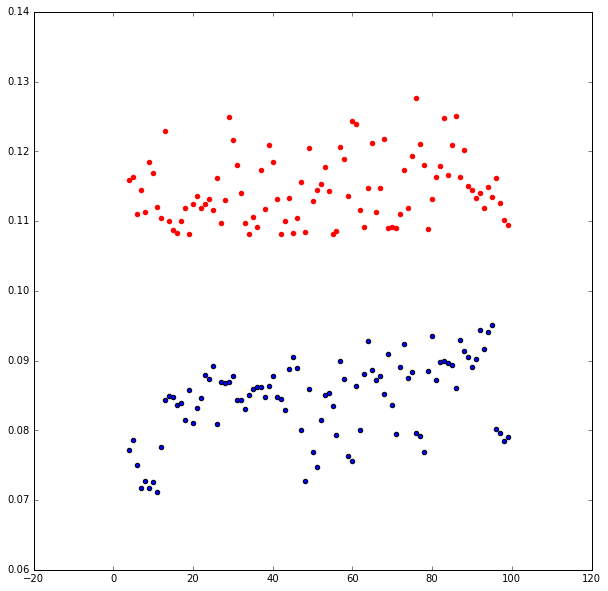

In [14]:
time_seq=np.loadtxt('time_our.txt')
time_truesize=np.loadtxt('time.truesize.txt')
f,ax =plt.subplots(figsize=(10, 10))
ax.scatter(range(4,100),time_seq,color='red')
ax.scatter(range(4,100),time_truesize)


In [18]:
def test_stat(start,end,window,z_score):
    
    tmp=sum(z_score[start:end])/math.sqrt(window)
    
    return(tmp)

In [89]:
def scan_1d(X,window_seq,num_obs):
    num_window=len(window_seq)
    n=X.shape[0]
    

    result_dict={}
    best_result={}
    
    z_score=np.zeros(n)
    for i in range(n):
        z_score[i]=math.pow(np.mean(X[i,])/(np.std(X[i,])/math.sqrt(num_obs)),2)
 
 
   
    max_scan=0
    max_window=0
    start_idx=0
    end_idx=0
    
    for window in window_seq:
       
        
        scan_stat=np.zeros(n-window+1)

        for i in range(n-window+1):
            scan_stat[i]=test_stat(i,i+window,window,z_score)
            
        I_hat=np.max(scan_stat)
        cluster_idx=np.argmax(scan_stat)
        if max_scan<I_hat:
            max_scan=I_hat
            max_window=window
            start_idx=cluster_idx
            end_idx=cluster_idx+max_window-1
            max_scan_stat= scan_stat
            
        result_dict[str(window)]=(window,scan_stat,I_hat,cluster_idx)
    
 
   
    best_result["max_scan"]=max_scan
    best_result["start_idx"]=start_idx
    best_result["end_idx"]=end_idx
    best_result["max_scan_stat"]=max_scan_stat
    best_result["max_window"]=max_window
    best_result["z_score"]=z_score
    best_result["window_sequence"]=window_seq
   
    
    return best_result,result_dict
    
    
    
    
    
    #max_scan_2=np.sort(I_hat)[len(I_hat)-2]
    #max_window_2=window_seq[I_hat==max_scan_2][0]
    #start_idx_2=(cluster_idx[I_hat==max_scan_2])[0]
    #end_idx_2=(start_idx_2+max_window_2)-1
    #add_result_2=add(locals()['scan_{0}'.format( "%02d" % (max_window_2))],start_idx_2,end_idx_2,max_window_2,max_scan_2,z_score)
    
    
    #return(add_result_1)

In [112]:
def left_start_point(left_potential_start,window_seq,max_window,add_thres):
    if len(left_potential_start)==0:
        left_add_window=0
    else:
        left_start_add=max(left_potential_start)
        if left_start_add==1:
            left_add_window=1                        
        else:
            
            window_can_add=max(np.array(window_seq)[left_start_add-window_seq>=0])
                         
            if max_window>=add_thres:
                left_add_window=window_can_add/2
            else:
                left_add_window=window_can_add
    return left_add_window                    

In [120]:
def right_start_point(right_potential_start,window_seq,max_window,add_thres):
    if len(right_potential_start)==0:
        right_add_window=0
    else:
        right_start_add=max(right_potential_start)
        if right_start_add==1:
            right_add_window=1
        else:
            window_can_add=max(np.array(window_seq)[right_start_add-window_seq>=0])
                         
            if max_window>=add_thres:
                right_add_window=window_can_add/2
            else:
                right_add_window=window_can_add
    return right_add_window                    

In [128]:
def add(best_result,add_thres=64):
    
    
    max_scan= best_result["max_scan"]
    start_idx=best_result["start_idx"]
    end_idx=best_result["end_idx"]
    max_scan_stat=best_result["max_scan_stat"]
    max_window=best_result["max_window"]
    z_score=best_result["z_score"]
    window_seq=best_result["window_sequence"]
    
    final_result={}
    
    
    n=len(max_scan_stat)
    slope=np.array(range(n),dtype='float64')
    
    for w in range(n):
        if w!=start_idx:
            slope[w]=abs((max_scan_stat[w]-max_scan_stat[start_idx])/(start_idx-w))
        else:
            slope[w]=1e6
    #left
    left_mean=np.nanmean(slope[(start_idx-max_window):start_idx])
    
    selected_left_slope=slope[(start_idx-max_window):start_idx]
    
    left_potential_start=len(selected_left_slope)-np.where(selected_left_slope<left_mean)[0]  
    
    left_add_window=left_start_point(left_potential_start,window_seq,max_window,add_thres)
   
    #right
    right_mean= np.nanmean(slope[start_idx+1:start_idx+max_window])                    
   
    selected_right_slope=slope[start_idx+1:start_idx+max_window]
    
    right_potential_start=np.where(selected_right_slope<right_mean)[0]+1
           
    right_add_window=right_start_point(right_potential_start,window_seq,max_window,add_thres)      
            
    
    while left_add_window>2:
        add_left_scan=test_stat(start_idx-left_add_window,end_idx,max_window+left_add_window,z_score)
        if add_left_scan<max_scan: #add smaller
            left_add_window=left_add_window/2
            continue
        else:
            max_scan=add_left_scan
            start_idx=start_idx-left_add_window
            max_window=max_window+left_add_window
            left_add_window=left_add_window/2

    while right_add_window >2:
        add_right_scan=test_stat(start_idx,end_idx+right_add_window,max_window+right_add_window,z_score)
        if add_right_scan<max_scan: #add smaller
            right_add_window=right_add_window/2
            continue
        else:
            max_scan=add_right_scan
            end_idx=end_idx+right_add_window
            max_window=max_window+right_add_window
            right_add_window=right_add_window/2
                         
    final_result["max_scan"]=max_scan
    final_result["start_idx"]=start_idx
    final_result["end_idx"]=end_idx
    final_result["max_window"]=max_window
                         
                         
                         
    return final_result



In [90]:
best_result,result_dict=scan_1d(X,window_seq,size)

In [92]:
print(best_result['start_idx'],best_result['end_idx'])

502 517


In [129]:
add(best_result,add_thres=64)


{'end_idx': 517,
 'max_scan': 449.47942293467804,
 'max_window': 16,
 'start_idx': 502}

In [366]:
#ignore this

B=100
p_value=range(len(window_seq))
for w in range(len(window_seq)):
    window=window_seq[w]
    scan_tmp_per=np.zeros(n-window+1,dtype='float64')
    I_per=range(B)
    for k in range(B):
        target_tmp=np.random.permutation(target)
        for i in range(n-window+1):
            for j in range(i,i+window):
                tmp=np.mean(d[j,(target_tmp==1)])-np.mean(d[j,(target_tmp==0)])*math.sqrt(n/2)
                tmp=math.pow(tmp,2)
                scan_tmp_per[i]= scan_tmp_per[i]+tmp
            scan_tmp_per[i]=scan_tmp_per[i]/math.sqrt(window)
        I_per[k]=max(scan_tmp_per)
    p_value[w]=(len(np.where(np.array(I_per)>=I_hat[w])[0])+1.0)/(float(B)+1.0)
    


KeyboardInterrupt: 

In [671]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
reg = linear_model.Lasso(alpha = 1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_


array([ 0.,  0.])

In [734]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.preprocessing import StandardScaler


In [751]:
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y=scaler.fit_transform(boston['target'])


/Users/StevenWang/Desktop/User/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/StevenWang/Desktop/User/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


-5.1956682259137756e-16

In [1125]:
#2d
cluster=[range(100,150),range(100,150)]
d=np.zeros((n, n))
#idx_i = [i for i in range(n) if i not in cluster[0]]
#idx_j = [j for j in range(n) if j not in cluster[1]]


        
for i in range(n):
    for j in range(n):
        d[i,j]=np.random.randn(1)*2+np.random.randn(1)
    
for i in cluster[0]:
    for j in cluster[1]:
        d[i,j]=2+np.random.randn(1)*2+np.random.randn(1)
        
plt.gray()
plt.imshow(d)

KeyboardInterrupt: 

In [1103]:
window_size_seq=[[4,4],[8,8],[16,16],[32,32],[64,64],[128,128],[256,256]]#height,width

max_scan=np.zeros(7,dtype='float64')
scan_stat=np.zeros((n,n),dtype='float64')
max_index=np.zeros((7,2),dtype='float64')


for k in range(7):
    window_size=window_size_seq[k]
    size=window_size[0]*window_size[1]
    for i in range(n-window_size[1]+1):#by col
        for j in range(n-window_size[0]+1): #by row
            tmp=np.square(d[j:j+window_size[0],i:i+window_size[1]])
            scan_stat[i,j]=(np.sum(tmp))/(size)
    max_scan[k]=np.max(scan_stat)
    max_index[k,]=np.where(scan_stat==np.max(scan_stat))

KeyboardInterrupt: 

In [993]:
for i in range(30):
    locals()['p_value_{0}'.format( "%02d" % (i+1))]=range(247)
    

array([ 20.26399768,  14.27836993,  13.02534001,  13.02534001,
        13.02534001,  13.02534001,  13.02534001])

max_index

In [994]:
max_index

array([[ 122.,  119.],
       [ 121.,  103.],
       [ 706.,  993.],
       [ 706.,  993.],
       [ 706.,  993.],
       [ 706.,  993.],
       [ 706.,  993.]])

In [938]:
np.sqrt(2)

1.4142135623730951

22.532806324110691

(13,)